### Hypothesis: Can we infer the malignancy of the lesion by patient information age,sex  and location of lesion.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# load csv
data = pd.read_csv('../data/processed/Metadata_processed.csv')

In [4]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,dataset,dx_binary
0,HAM_0000118,ISIC_0027419.jpg,bkl,histo,80.0,male,scalp,vidir_modern,not_skin_cancer
1,HAM_0000118,ISIC_0025030.jpg,bkl,histo,80.0,male,scalp,vidir_modern,not_skin_cancer
2,HAM_0002730,ISIC_0026769.jpg,bkl,histo,80.0,male,scalp,vidir_modern,not_skin_cancer
3,HAM_0002730,ISIC_0025661.jpg,bkl,histo,80.0,male,scalp,vidir_modern,not_skin_cancer
4,HAM_0001466,ISIC_0031633.jpg,bkl,histo,75.0,male,ear,vidir_modern,not_skin_cancer


In [5]:
# define X and y
y = data['dx_binary']
X = data.drop(['dx_binary'], axis=1)
X = X.drop(["lesion_id"], axis=1)
X = X.drop(["image_id"], axis=1)
X = X.drop(["dx"], axis=1)
X = X.drop(["dx_type"], axis=1)
#X = X.drop(["age"], axis=1)
X = X.drop(["dataset"], axis=1)

In [6]:
X.head()

,age,sex,localization
0,80.0,male,scalp
1,80.0,male,scalp
2,80.0,male,scalp
3,80.0,male,scalp
4,75.0,male,ear


In [7]:
# train test split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=data['dx_binary'], test_size=0.2, random_state=42)


In [8]:
# dummy encode categorical variables

from sklearn.preprocessing import OneHotEncoder

# instantiate encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

# fit and transform training data
X_train = pd.DataFrame(encoder.fit_transform(X_train), columns=encoder.get_feature_names_out())
X_test = pd.DataFrame(encoder.transform(X_test), columns=encoder.get_feature_names_out())

#get feature names
#feature_names = list(encoder.get_feature_names_out())

# one-hot encoding removed index; put it back
X_train.index = X_train.index
X_test.index = X_test.index


# label encoder for target variable
from sklearn.preprocessing import LabelEncoder

# instantiate encoder
le = LabelEncoder()
le.classes_ = ['not_skin_cancer', 'skin_cancer']

# fit and transform training data
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)


# standardize data
from sklearn.preprocessing import StandardScaler

# instantiate scaler

scaler = StandardScaler()

# fit and transform training data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)





/Users/da.ma.ro/Documents/Capstone/capstone-healthy-skin/.venv/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [9]:
le.classes_

array(['not_skin_cancer', 'skin_cancer'], dtype=object)

In [10]:
from sklearn.linear_model import LogisticRegression
# instantiate model
logreg = LogisticRegression()

# fit model
logreg.fit(X_train, y_train)

# generate predictions
y_pred = logreg.predict(X_test)

# generate probabilities
y_pred_proba = logreg.predict_proba(X_test)

# score model
logreg.score(X_test, y_test)


# confusion matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred)



array([[1527,   85],
       [ 308,   83]])

In [11]:
# classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))




              precision    recall  f1-score   support

           0       0.83      0.95      0.89      1612
           1       0.49      0.21      0.30       391

    accuracy                           0.80      2003
   macro avg       0.66      0.58      0.59      2003
weighted avg       0.77      0.80      0.77      2003



In [12]:
# show accuracy
from sklearn.metrics import accuracy_score

print('Accuracy: ', accuracy_score(y_test, y_pred))

Accuracy:  0.8037943085371942


In [13]:
# show roc auc score
from sklearn.metrics import roc_auc_score

print('ROC AUC Score: ', roc_auc_score(y_test, y_pred_proba[:,1]))



ROC AUC Score:  0.7788747120382299


Text(0.5, 1.0, 'ROC Curve Metadata-LogReg')

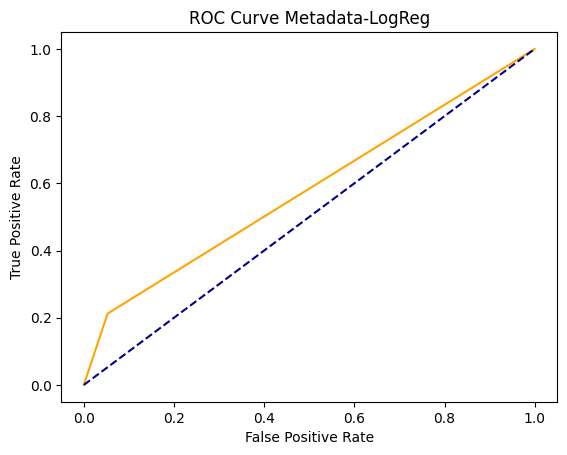

In [15]:
#plot roc curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)

plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Metadata-LogReg')

In [ ]:
feature_names = X.columns
coefficents = logreg.coef_[0]
for feature,coef in zip(feature_names,coefficents):
    print(feature,coef)

age -0.34487937567758054
sex -0.5349154189129592
localization -0.3240342184820043
